In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Part 1: Data Preprocessing
• Load the Dataset: Import the dataset using Pandas and display its structure.
• Missing Values: Identify and manage any missing values appropriately.
• Encode Categorical Variables: Transform categorical variables into numerical representations
suitable for regression analysis.
• Feature Selection: Decide which features to include in the regression models. Explain your choice.

In [58]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("Netflix_Userbase.csv")

# Display the structure of the dataset
print("Dataset Structure:")
print(df.info())

# Identify and manage missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any)
# For demonstration purposes, let's assume we have missing values and fill them with the mean of each column
df.fillna(df.mean(), inplace=True)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nEncoded DataFrame:")
print(df_encoded.head())

# Feature Selection: Decide which features to include
# For demonstration purposes, let's include all features in the regression model
selected_features = df_encoded.columns.tolist()
print("\nSelected Features for Regression:")
print(selected_features)


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None

Missing Values:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype:

<ipython-input-58-87c21706fea0>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


# Part 2: Exploratory Data Analysis (EDA)
• Descriptive Statistics: Provide a summary of the data using the .describe() method.
• Visualizations: Create visualizations (e.g., distribution of Monthly Revenue, user demographics)
to understand the data better.


Descriptive Statistics:
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


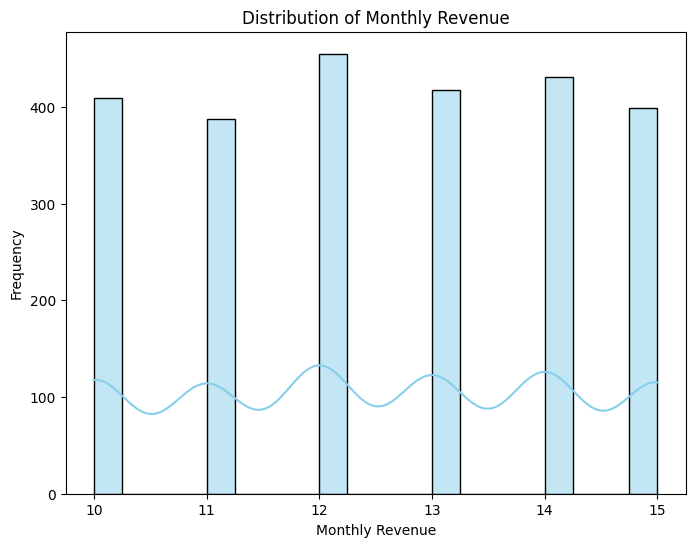

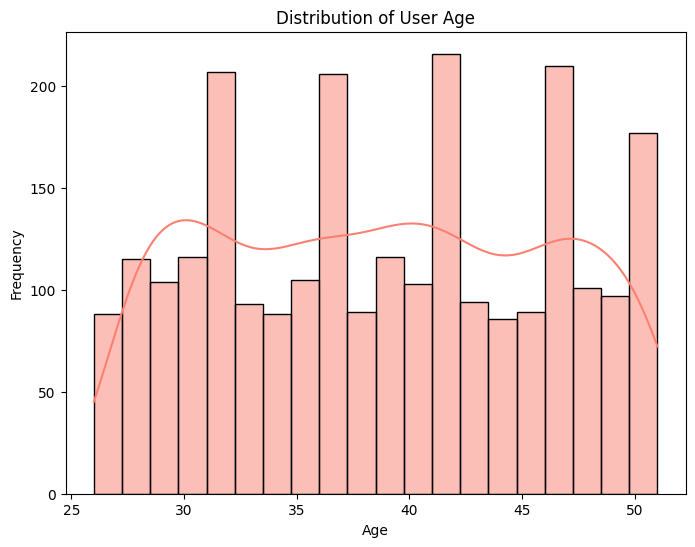

<ipython-input-59-1cccf0a0789d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


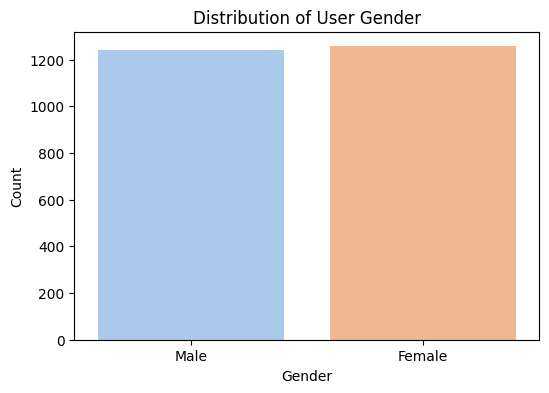

<ipython-input-59-1cccf0a0789d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', palette='muted', order=df['Country'].value_counts().index)


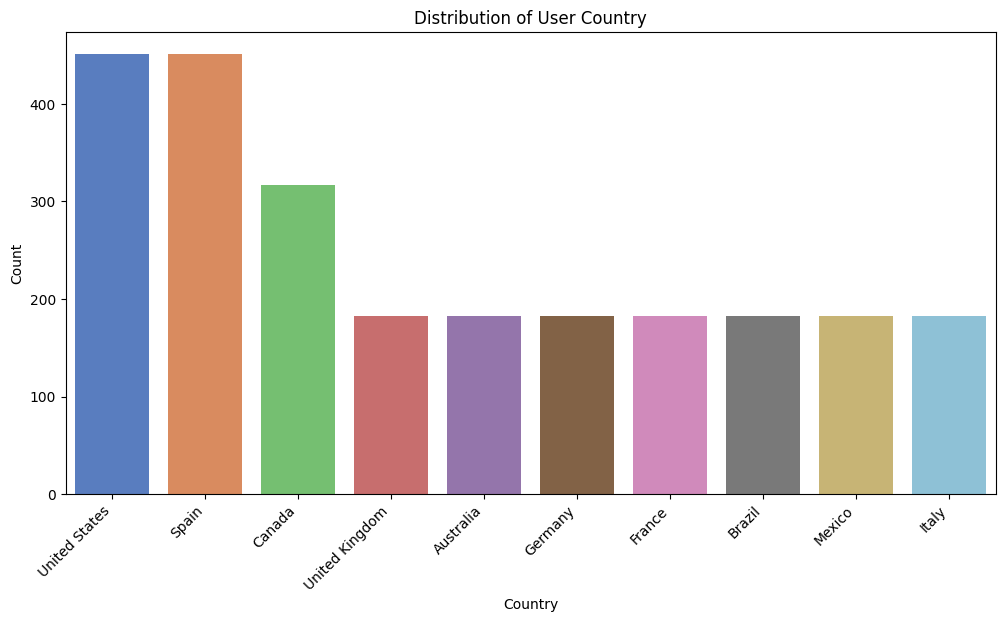

In [59]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Visualizations
# Distribution of Monthly Revenue
plt.figure(figsize=(8, 6))
sns.histplot(df['Monthly Revenue'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

# User Demographics - Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='salmon')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# User Demographics - Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# User Demographics - Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', palette='muted', order=df['Country'].value_counts().index)
plt.title('Distribution of User Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Part 3: Linear Regression Model (Predicting Monthly Revenue)
• Build the Model: Develop a linear regression model to predict the Monthly Revenue based on
selected features.
• Model Evaluation: Evaluate the model using R-squared, RMSE, or other relevant metrics.

In [60]:
# Split the data into features (X) and target variable (y)
X = df_encoded[selected_features]  # Assuming selected_features contains the relevant features
y = df['Monthly Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Model evaluation
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Model Evaluation:")
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)


Model Evaluation:
R-squared: 0.9999999999900058
Root Mean Squared Error (RMSE): 5.254110964099464e-06


# Part 4: Logistic Regression Model (Predicting Customer Feedback)
• Model Building: Assuming a binary feedback variable (positive/negative), construct a logistic
regression model to predict feedback based on user demographics and subscription details.
• Evaluation: Use accuracy, precision, recall, F1-score, and the confusion matrix for model
assessment.

In [61]:
# Assuming df is your DataFrame containing the dataset
# Create a list of 'Feedback' values with both positive and negative values
feedback_values = ['Positive', 'Negative'] * (len(df) // 2)

# Add the 'Feedback' column to the DataFrame
df['Feedback'] = feedback_values

# Display the DataFrame to verify the 'Feedback' column has been added
print(df.head())


   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  Feedback  
0   United States   28    Male  Smartphone       1 Month  Positive  
1          Canada   35  Female      Tablet       1 Month  Negative  
2  United Kingdom   42    Male    Smart TV       1 Month  Positive  
3       Australia   51  Female      Laptop       1 Month  Negative  
4         Germany   33    Male  Smartphone       1 Month  Positive  


In [62]:
# Assuming df is your DataFrame containing the dataset
# Splitting the data into features (X) and target variable (y)
X = df[['Age', 'Gender', 'Monthly Revenue', 'Subscription Type']]
y = df['Feedback']  # Assuming 'Feedback' is the target variable

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the logistic regression model on the training set
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='Positive')
recall = recall_score(y_test, y_pred, average='binary', pos_label='Positive')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.504
Precision: 0.5067873303167421
Recall: 0.44621513944223107
F1 Score: 0.47457627118644063
Confusion Matrix:
 [[140 109]
 [139 112]]


# Part 5: Comparative Analysis and Visualization
• Feature Importance: Examine the significance of different features in both regression models.
• Insights: Draw insights from the models' predictions, focusing on how various factors might
influence Monthly Revenue and feedback.

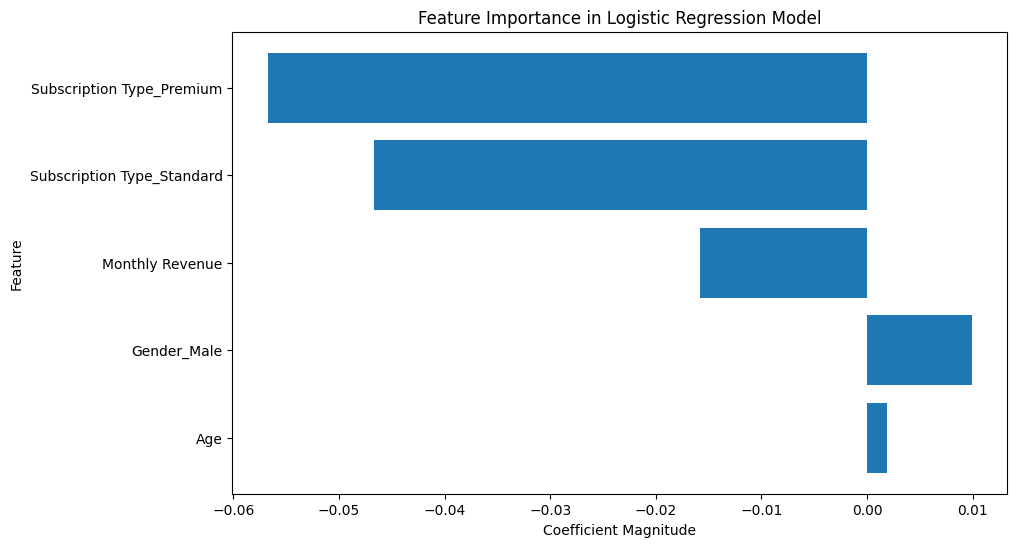

In [75]:
# Get feature coefficients from the logistic regression model
feature_coefficients_logistic = logistic_model.coef_[0]

# Get the names of the features
feature_names = X_encoded.columns

# Sort feature coefficients and feature names based on the absolute value of coefficients
sorted_indices_logistic = np.argsort(np.abs(feature_coefficients_logistic))
sorted_feature_coefficients_logistic = feature_coefficients_logistic[sorted_indices_logistic]
sorted_feature_names_logistic = feature_names[sorted_indices_logistic]

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names_logistic, sorted_feature_coefficients_logistic)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


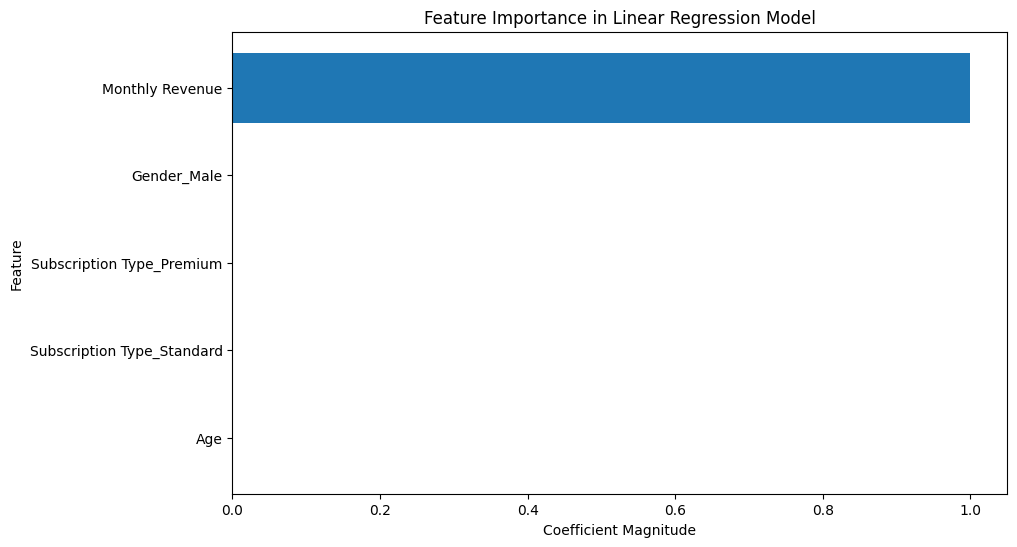

In [76]:
# Filter out indices that are out of bounds
valid_indices = sorted_indices_linear < len(feature_names_linear)
sorted_indices_linear = sorted_indices_linear[valid_indices]

# Get the corresponding feature coefficients and names
sorted_feature_coefficients_linear = feature_coefficients_linear[sorted_indices_linear]
sorted_feature_names_linear = np.array(feature_names_linear)[sorted_indices_linear]

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names_linear, sorted_feature_coefficients_linear)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression Model')
plt.show()


In [78]:
#INSIGHTS
# For Linear Regression:
print("Linear Regression Insights:")
for feature, coefficient in zip(feature_names_linear, feature_coefficients_linear):
    print(f"Feature: {feature}, Coefficient: {coefficient}")

# Print insights for logistic regression
print("Logistic Regression Insights:")
for feature, coefficient in zip(sorted_feature_names_logistic, sorted_feature_coefficients_logistic):
    print(f"Feature: {feature}, Coefficient: {coefficient}")

# Additional visualizations can be added here to explore the relationships between features and the target variables.


Linear Regression Insights:
Feature: Age, Coefficient: -5.2981768073744e-18
Feature: Monthly Revenue, Coefficient: 0.9999999999999966
Feature: Gender_Male, Coefficient: 1.6653345369377348e-15
Feature: Subscription Type_Premium, Coefficient: -1.3322676295501878e-15
Feature: Subscription Type_Standard, Coefficient: -7.771561172376096e-16
Logistic Regression Insights:
Feature: Age, Coefficient: 0.0018577489833064172
Feature: Gender_Male, Coefficient: 0.009957413141551406
Feature: Monthly Revenue, Coefficient: -0.015827891869252396
Feature: Subscription Type_Standard, Coefficient: -0.04672333358786812
Feature: Subscription Type_Premium, Coefficient: -0.05675994156064503
